In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env XLA_FLAGS=--xla_gpu_deterministic_ops=true

env: XLA_FLAGS=--xla_gpu_deterministic_ops=true


In [3]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [17]:
from citylearn.citylearn import CityLearnEnv
# from stable_baselines3.sac import SAC
from sbx import DDPG
import pickle
from rewardFunctions.rewardFunction3 import CustomRewardFunction

test_name = 'ddpg_2024-04-28-86'

with open("./saved/DDPG/" + test_name + "/" + test_name + ".pkl", "rb") as f:
    env = pickle.load(f)

model = DDPG.load("./saved/DDPG/" + test_name + "/" + test_name + ".zip", env=env)

observations = env.reset()
actions_list = []
rewards_list = []

while not env.done:
    actions, _ = model.predict(observations, deterministic=True)
    observations, reward, _, _ = env.step(actions)
    actions_list.append(actions)
    rewards_list.append(reward)

kpis = env.evaluate()
kpis = kpis.pivot(index='cost_function', columns='name', values='value')
kpis = kpis.dropna(how='all')
display(kpis)

C:\Users\Domonkos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


name,Building_1,Building_2,District
cost_function,,,
annual_normalized_unserved_energy_total,0.0000,0.0000,0.0000
annual_peak_average,NaN,NaN,0.9184
carbon_emissions_total,1.0306,1.1810,1.1058
cost_total,1.0130,1.1310,1.0720
daily_one_minus_load_factor_average,NaN,NaN,0.9580
daily_peak_average,NaN,NaN,0.9043
discomfort_delta_average,-3.2760,-1.7385,-2.5072
discomfort_delta_maximum,0.8456,1.1519,0.9988
discomfort_delta_minimum,-6.6930,-5.5470,-6.1200


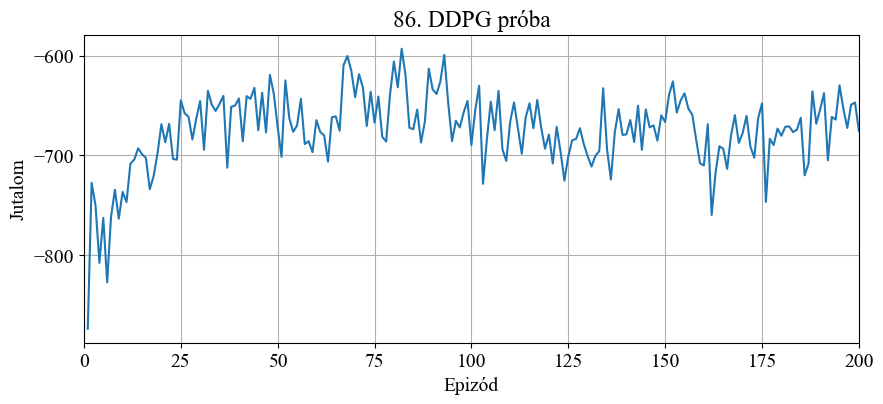

: 

In [65]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.rcParams.update({'font.size': 14, 'font.family': 'Times New Roman'})
sum_values = [episode_reward['sum'][0] for episode_reward in env.episode_rewards]

x_values = range(1, len(sum_values) + 1)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(x_values, sum_values, linestyle='-')
plt.title('86. DDPG próba')
plt.xlabel('Epizód')
plt.ylabel('Jutalom')
plt.xlim(0, 200)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.grid(True)
plt.show()

In [20]:
import optuna

study_name = 'DDPG_tuning_2024-04-21-0'

study = optuna.load_study(study_name=study_name, storage=f"sqlite:///hyperparameter_tuning/DDPG/{study_name}.db")

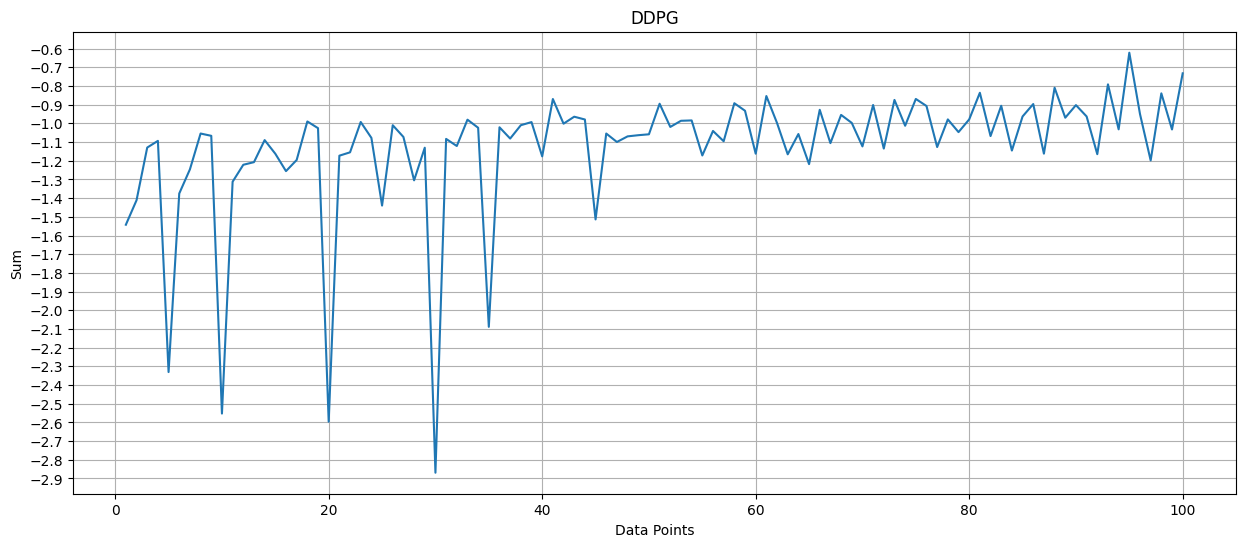

In [53]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

sum_values = study.best_trial.intermediate_values.values()

x_values = range(1, len(sum_values) + 1)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(x_values, sum_values, linestyle='-')
plt.title('DDPG')
plt.xlabel('Data Points')
plt.ylabel('Sum')
plt.grid(True)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

In [24]:
study.best_trials

[FrozenTrial(number=86, state=TrialState.COMPLETE, values=[-0.5455471845644635], datetime_start=datetime.datetime(2024, 4, 23, 18, 37, 35, 5538), datetime_complete=datetime.datetime(2024, 4, 23, 18, 41, 46, 687471), params={'gamma': 0.00039963178759300124, 'lr': 0.0019712131059869656, 'net_arch': 'tiny', 'activation_fn': 'relu', 'batch_size': 317, 'gradient_steps': 8, 'use_sde': True, 'train_freq': 22, 'tau': 0.0004102675933620348, 'action_noise_sigma': 0.10639924552055172, 'action_noise': 'OrnsteinUhlenbeckActionNoise'}, user_attrs={'gamma_': 0.999600368212407}, system_attrs={}, intermediate_values={1: -1.5423668162059698, 2: -1.4112181404900455, 3: -1.1294498175960155, 4: -1.0936393094446109, 5: -2.330553701345502, 6: -1.3753683114800628, 7: -1.246040907854554, 8: -1.054340830111153, 9: -1.0666545173295827, 10: -2.5526911873141183, 11: -1.3122449256617248, 12: -1.221532426299608, 13: -1.2075105147191, 14: -1.0895566597738988, 15: -1.1625230660775399, 16: -1.2555167921250976, 17: -1.1

In [25]:
study.best_trial

FrozenTrial(number=86, state=TrialState.COMPLETE, values=[-0.5455471845644635], datetime_start=datetime.datetime(2024, 4, 23, 18, 37, 35, 5538), datetime_complete=datetime.datetime(2024, 4, 23, 18, 41, 46, 687471), params={'gamma': 0.00039963178759300124, 'lr': 0.0019712131059869656, 'net_arch': 'tiny', 'activation_fn': 'relu', 'batch_size': 317, 'gradient_steps': 8, 'use_sde': True, 'train_freq': 22, 'tau': 0.0004102675933620348, 'action_noise_sigma': 0.10639924552055172, 'action_noise': 'OrnsteinUhlenbeckActionNoise'}, user_attrs={'gamma_': 0.999600368212407}, system_attrs={}, intermediate_values={1: -1.5423668162059698, 2: -1.4112181404900455, 3: -1.1294498175960155, 4: -1.0936393094446109, 5: -2.330553701345502, 6: -1.3753683114800628, 7: -1.246040907854554, 8: -1.054340830111153, 9: -1.0666545173295827, 10: -2.5526911873141183, 11: -1.3122449256617248, 12: -1.221532426299608, 13: -1.2075105147191, 14: -1.0895566597738988, 15: -1.1625230660775399, 16: -1.2555167921250976, 17: -1.19

In [23]:
study.best_trial.intermediate_values

{1: -1.5423668162059698,
 2: -1.4112181404900455,
 3: -1.1294498175960155,
 4: -1.0936393094446109,
 5: -2.330553701345502,
 6: -1.3753683114800628,
 7: -1.246040907854554,
 8: -1.054340830111153,
 9: -1.0666545173295827,
 10: -2.5526911873141183,
 11: -1.3122449256617248,
 12: -1.221532426299608,
 13: -1.2075105147191,
 14: -1.0895566597738988,
 15: -1.1625230660775399,
 16: -1.2555167921250976,
 17: -1.1959338355921143,
 18: -0.9897683654342616,
 19: -1.0256806857503953,
 20: -2.596172684926366,
 21: -1.1729101696324558,
 22: -1.1549379690791743,
 23: -0.9926122735535804,
 24: -1.0776475860825832,
 25: -1.4397594396893127,
 26: -1.0098862403377775,
 27: -1.0727075074771717,
 28: -1.3047908817888265,
 29: -1.1301572467350633,
 30: -2.869216972582485,
 31: -1.0831358816645427,
 32: -1.1211238506806038,
 33: -0.9802190378570164,
 34: -1.023496149109701,
 35: -2.0886869696498156,
 36: -1.020961066408384,
 37: -1.081263902918437,
 38: -1.0097898699887091,
 39: -0.9931489281184336,
 40: -1

In [43]:
original_data = study.best_trial.intermediate_values

new_data = {}
group_sum = 0
count = 0

for i in range(1, len(original_data) + 1):
    count += 1

    if count == 3 or (count > 3 and count % 3 == 0):
        group_sum += original_data[i] / 2  # Add half of the third element
        mean = group_sum / 2.5  # Calculate the mean for the group
        new_data[len(new_data) + 1] = mean
        if (i % 2 == 0):
            print("tele")
            count = 0
            group_sum = 0
        else:
            print("félig")
            count = 0
            group_sum = original_data[i] / 2
    else:
        group_sum += original_data[i]
    # elif i == len(original_data):  # Last iteration, handle remaining elements
    #     mean = group_sum / (count + 0.5)  # Count + 0.5 for the last incomplete group
    #     new_data[len(new_data) + 1] = mean

print(new_data)

félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
tele
félig
{1: -1.407323946197609, 2: -1.870640830131261, 3: -1.1334835986521994, 4: -2.0036118339161755, 5: -1.1513314830127075, 6: -1.4110385373892451, 7: -1.6833233821971956, 8: -1.3091316481961097, 9: -1.1943997735062704, 10: -1.7623641474214875, 11: -1.077747700509462, 12: -1.6451092683568866, 13: -1.0350512947865451, 14: -1.2174970487330874, 15: -1.080261734251109, 16: -1.3783287423964414, 17: -1.0277240971967905, 18: -1.177946636608318, 19: -1.1040719446433758, 20: -1.181482893302769, 21: -0.9739206672380247, 22: -1.328645081102527, 23: -1.02365200795209, 24: -1.2364745969490545, 25: -0.928812576864803, 26: -1.1831353458341256, 27: -0.9775417990945299, 28: -1.1858732270441927, 29: -0.976339673958228, 30: -1.1244743953335699, 31: -1.0093850451649273, 32: -1.009818382302656, 33: -1.021615044239055}


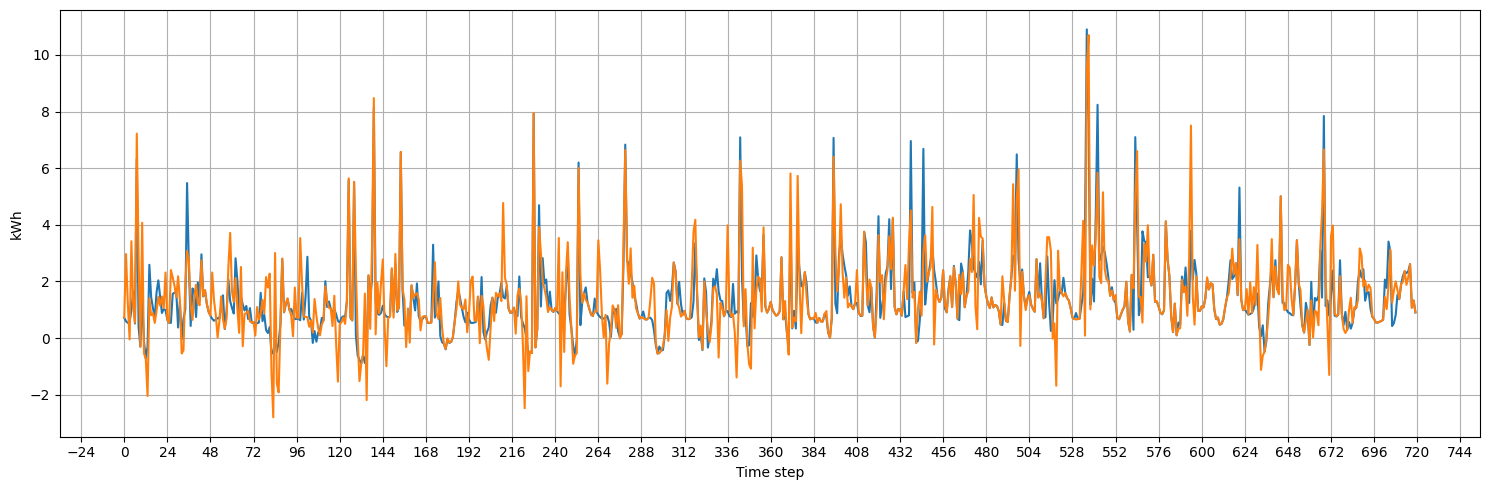

In [6]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline

envs = {
    'DDPG': env,
}

figsize = (15.0, 5)
fig, ax = plt.subplots(1, 1, figsize=figsize)

for k, v in envs.items():
    y = v.net_electricity_consumption_without_storage
    x = range(len(y))
    ax.plot(x, y, label=k)
    y = v.net_electricity_consumption
    x = range(len(y))
    ax.plot(x, y, label=k)

# y = v.electrical_storage_electricity_consumption
# ax.plot(x, y, label='Battery')
# y = v.dhw_storage_electricity_consumption
# ax.plot(x, y, label='DHW storage')


ax.set_xlabel('Time step')
ax.set_ylabel('kWh')
# ax.set_xlim(120, 160)
ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
# ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0)

plt.grid()
plt.tight_layout()

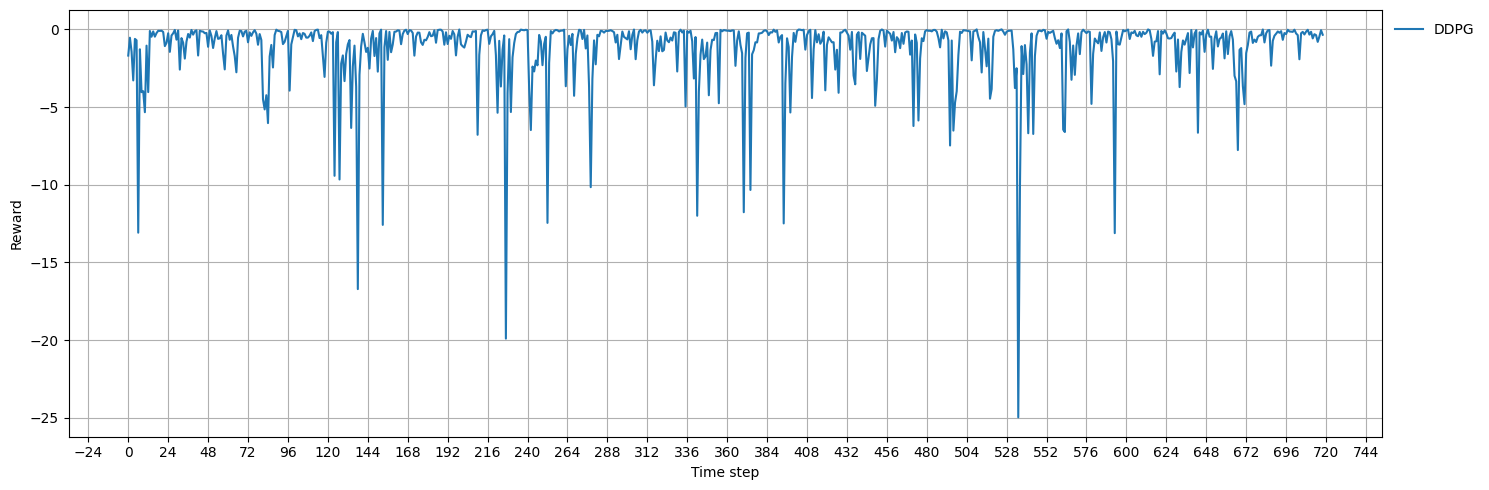

In [7]:
import matplotlib.ticker as ticker
%matplotlib inline

figsize = (15.0, 5)
fig, ax = plt.subplots(1, 1, figsize=figsize)

y = rewards_list
x = range(len(y))
ax.plot(x, y, label=k)

ax.set_xlabel('Time step')
ax.set_ylabel('Reward')
# ax.set_ylim(-2, 3)
# ax.set_xlim(120, 160)
ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0)
plt.grid()

plt.tight_layout()

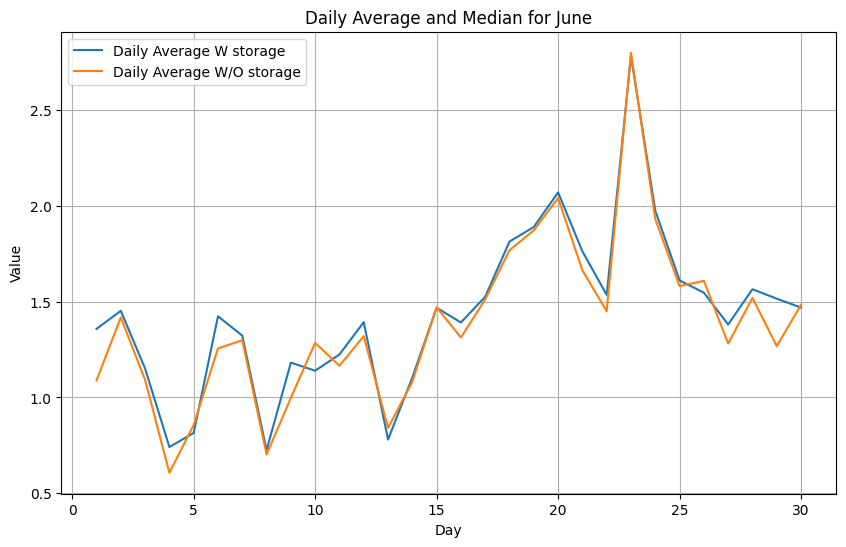

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

hourly_data_with_storage = pd.DataFrame({'value': env.net_electricity_consumption})
daily_data_with_storage = [hourly_data_with_storage[i:i+24] for i in range(0, len(hourly_data_with_storage), 24)]

daily_averages_with_storage = [day.mean() for day in daily_data_with_storage]
daily_medians_with_storage = [day.median() for day in daily_data_with_storage]
daily_90th_percentiles_with_storage = [np.percentile(day, 99) for day in daily_data_with_storage]


hourly_data_without_storage = pd.DataFrame({'value': env.net_electricity_consumption_without_storage})
daily_data_without_storage = [hourly_data_without_storage[i:i+24] for i in range(0, len(hourly_data_without_storage), 24)]

daily_averages_without_storage = [day.mean() for day in daily_data_without_storage]
daily_medians_without_storage = [day.median() for day in daily_data_without_storage]
daily_90th_percentiles_without_storage = [np.percentile(day, 99) for day in daily_data_without_storage]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(daily_averages_with_storage) + 1), daily_averages_with_storage, label='Daily Average W storage')
# plt.plot(range(1, len(daily_medians_with_storage) + 1), daily_medians_with_storage, label='Daily Median W storage')
# plt.plot(range(1, len(daily_90th_percentiles_with_storage) + 1), daily_90th_percentiles_with_storage, label='Daily 90th percentile W storage')
plt.plot(range(1, len(daily_averages_without_storage) + 1), daily_averages_without_storage, label='Daily Average W/O storage')
# plt.plot(range(1, len(daily_medians_without_storage) + 1), daily_medians_without_storage, label='Daily Median W/O storage')
# plt.plot(range(1, len(daily_90th_percentiles_without_storage) + 1), daily_90th_percentiles_without_storage, label='Daily 90th percentile W/O storage')
plt.xlabel('Day')
plt.ylabel('Value')
plt.title('Daily Average and Median for June')
plt.legend()
plt.grid(True)
plt.show()

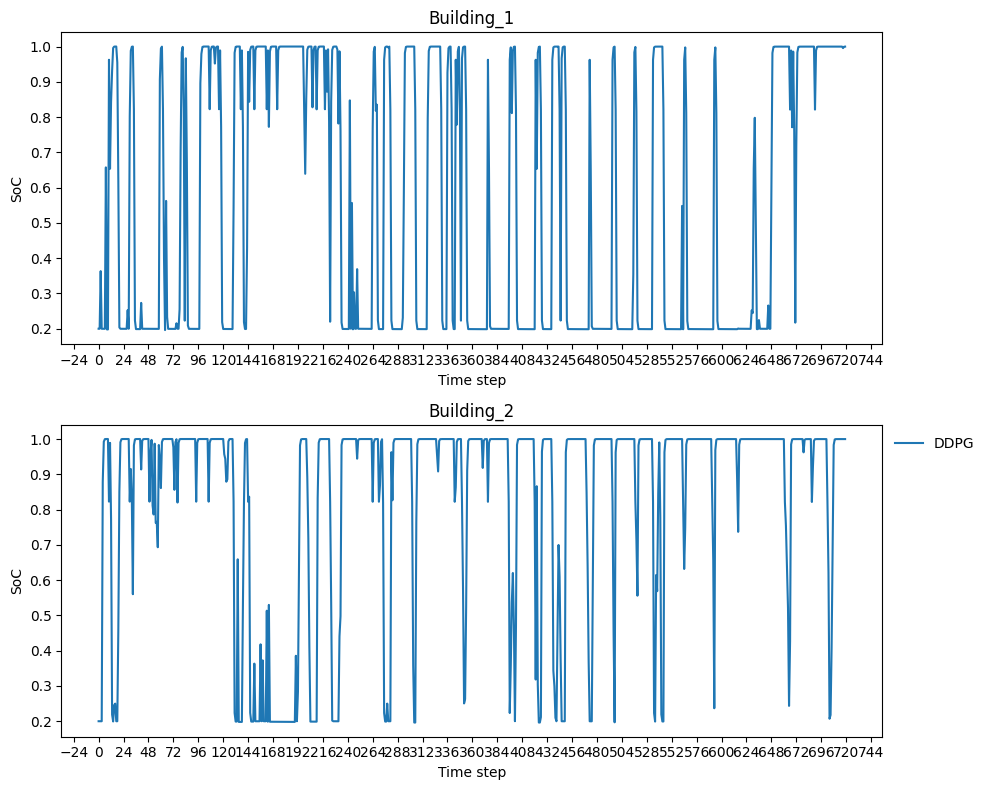

In [9]:
import math
%matplotlib inline

envs = {
    'DDPG': env,
}

building_count = len(list(envs.values())[0].buildings)
column_count_limit = 1
row_count = math.ceil(building_count/column_count_limit)
column_count = min(column_count_limit, building_count)
figsize = (10.0*column_count, 4*row_count)
fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

for i, ax in enumerate(fig.axes):
    for k, v in envs.items():
        soc = np.array(v.buildings[i].electrical_storage.soc)
        capacity = v.buildings[i].electrical_storage.capacity_history[0]
        y = soc
        x = range(len(y))
        ax.plot(x, y, label=k)

    ax.set_title(v.buildings[i].name)
    ax.set_xlabel('Time step')
    ax.set_ylabel('SoC')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(24))

    if i == building_count - 1:
        ax.legend(
            loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
        )
    else:
        ax.legend().set_visible(False)


plt.tight_layout()